# Source
https://cv.gluon.ai/build/examples_detection/demo_ssd.html

In [1]:
%matplotlib inline
!pip3 install gluoncv --upgrade
# !pip3 install mxnet
!pip install mxnet-cu101

     |████████████████████████████████| 1.3 MB 5.3 MB/s 
     |████████████████████████████████| 358.1 MB 4.7 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# 01. Predict with pre-trained SSD models

This article shows how to play with pre-trained SSD models with only a few
lines of code.

First let's import some necessary libraries:



In [2]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
from gluoncv.utils import try_import_cv2
cv2 = try_import_cv2()
import mxnet as mx
import time

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


## Load a pretrained model

Let's get an SSD model trained with 512x512 images on Pascal VOC
dataset with ResNet-50 V1 as the base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index` (https://cv.gluon.ai/model_zoo/index.html).



In [ ]:
net = model_zoo.get_model('ssd_512_resnet50_v1_voc', pretrained=True, ctx=mx.gpu(0))
# Compile the model for faster speed
# net.hybridize()

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


## Load a pretrained model (COCO Dataset)

Get a pretrained model trained on COCO Dataset

In [11]:
model = 'ssd_512_resnet50_v1_coco'
net = model_zoo.get_model(model, pretrained=True, ctx=mx.gpu(0))

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1784: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [4]:
print(net.classes)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


## Pre-process an image

Next we download an image, and pre-process with preset data transforms. Here we
specify that we resize the short edge of the image to 512 px. But you can
feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.ssd.load_test` (https://cv.gluon.ai/api/data.transforms.html#gluoncv.data.transforms.presets.ssd.load_test) if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.



In [12]:
# im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
#                           'gluoncv/detection/street_small.jpg?raw=true',
#                           path='street_small.jpg')
# x, img = data.transforms.presets.ssd.load_test(im_fname, short=512)
im_fnames = ['1024px-Newark_Airport_Wayfinding_Signage.jpeg', 'Philadelphia-airport-hallway-istock.jpeg']
sizes = []
for im_fname in im_fnames:
  img = cv2.imread(im_fname)
  h, w, _ = img.shape
  sizes.append((w, h))
xs, imgs = data.transforms.presets.ssd.load_test(im_fnames, short=512)
results = zip(xs, imgs)
for x, img in results:
  print('Shape of pre-processed image:', x.shape)

(1, 3, 512, 683)


## Inference and display

The forward function will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` (https://cv.gluon.ai/api/utils.html#gluoncv.utils.viz.plot_bbox) to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



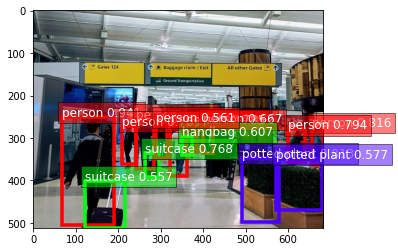

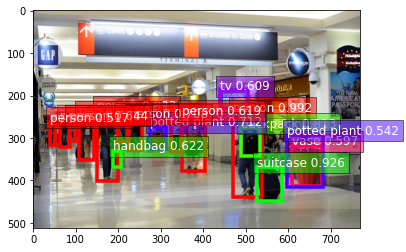

In [ ]:
# class_IDs, scores, bounding_boxes = net(x)
# class_IDs, scores, bounding_boxes = net(x.as_in_context(mx.gpu(0)))
# ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
#                           class_IDs[0], class_names=net.classes) 
# plt.show()

for i in range(len(im_fnames)):
  x = xs[i]
  img = imgs[i]
  # class_IDs, scores, bounding_boxes = net(x)
  class_IDs, scores, bounding_boxes = net(x.as_in_context(mx.gpu(0)))
  ax = utils.viz.plot_bbox(img, bounding_boxes[0], scores[0],
                          class_IDs[0], class_names=net.classes)
  plt.savefig(im_fnames[i][:-5]+'_ssd.jpeg', bbox_inches='tight')  
  plt.show()
  img = utils.viz.cv_plot_bbox(img, bounding_boxes[0], scores[0],
                          class_IDs[0], class_names=net.classes)
  img = cv2.resize(img, sizes[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  cv2.imwrite(im_fnames[i][:-5]+'_ssd.jpeg', img)

# Videos
Codes for videos

In [ ]:
t0 = time.time()

name = 'test.mp4'
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(name)

# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

# With webcam get(CV_CAP_PROP_FPS) does not work.
# Let's see for ourselves.

if int(major_ver)  < 3 :
  fps = cap.get(cv2.cv.CV_CAP_PROP_FPS)
else :
  fps = cap.get(cv2.CAP_PROP_FPS)

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
output_name = name[:-4]+'_' + model + '.mp4'
out = cv2.VideoWriter(output_name,cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width,frame_height))

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:

    # Display the resulting frame
    # cv2.imshow('Frame',frame)
    
    # Image pre-processing
    frame = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).astype('uint8')
    rgb_nd, frame = data.transforms.presets.ssd.transform_test(frame, short=512)
    class_IDs, scores, bounding_boxes = net(rgb_nd.as_in_context(mx.gpu(0)))
    img = utils.viz.cv_plot_bbox(frame, bounding_boxes[0], scores[0],
                          class_IDs[0], class_names=net.classes)
    img = cv2.resize(img, (frame_width,frame_height))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out.write(img)

    # Press Q on keyboard to  exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  # Break the loop
  else: 
    break

t1 = time.time()
total = t1-t0
print("Total Time: ", total)

# When everything done, release the video capture object
cap.release()
out.release()

# Closes all the frames
cv2.destroyAllWindows()

test_ssd_512_resnet50_v1_coco.mp4


KeyboardInterrupt: ignored